# Data Cleaning 
### Mental Health Survey Data 2016-2021

Refrences : https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

https://www.kaggle.com/code/kairosart/machine-learning-for-mental-health-1

In [36]:
#installing packages for ETL processes
import pandas as pd #for manupulating dataframes for analysis
import matplotlib.pyplot as plt #for numerical analysis
import seaborn as sns #for visulaisation
import numpy as np #mathematical functions and managing large dataset
from subprocess import check_output
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None 

In [37]:
# import dataset
df = pd.read_csv("./combined_surveys_2016-2021/mental_health_data_2016-2021.csv")

In [38]:
# drop duplicate rows
arp_data = df.drop_duplicates()

In [39]:
#Viewing dataset
arp_data

,Unnamed: 0,age,sex,self-employed,working_country,living_country,mental_illness_family_history,have_mental_illness,mental_disorder_in_the_past,number_of_employees_your_company_has,mental_health_benefits_from_previous_employers,mental_illness_diagnosis,mental_health_benefits_from_current_employer,discussing_mental_health_with_coworkers,sought_mental_treatment,discussing_mental_health_with_supervisor,mental_illness_medical_coverage
0,0,39.0,Male,0,United Kingdom,United Kingdom,No,No,Yes,26-100,"No, none did",Yes,Not eligible for coverage / NA,Maybe,0,Yes,NaN
1,1,29.0,male,0,United States of America,United States of America,Yes,Yes,Yes,0-25,"Yes, they all did",Yes,No,Maybe,1,Yes,NaN
2,2,38.0,Male,0,United Kingdom,United Kingdom,No,No,Maybe,0-25,"No, none did",No,No,Maybe,1,Maybe,NaN
3,3,43.0,male,1,United Kingdom,United Kingdom,No,Yes,Yes,NaN,Some did,Yes,NaN,NaN,1,NaN,1.0
4,4,43.0,Female,0,United States of America,United States of America,Yes,Yes,Yes,0-25,I don't know,Yes,Yes,Maybe,1,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,126,33.0,Male,0,Germany,Germany,I don't know,Yes,Yes,26-100,"No, none did",Yes,No,No,1,Yes,NaN
3265,127,49.0,Male,0,Portugal,Portugal,Yes,No,Possibly,100-500,"No, none did",NaN,No,Maybe,0,Maybe,NaN
3266,128,28.0,NaN,1,Switzerland,Pakistan,No,No,Don't Know,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0
3267,129,26.0,Male,1,India,India,No,Don't Know,Don't Know,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0


In [40]:
#dropping unnamed column 
arp_data.drop('Unnamed: 0', 1)

c:\Users\Atakan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,age,sex,self-employed,working_country,living_country,mental_illness_family_history,have_mental_illness,mental_disorder_in_the_past,number_of_employees_your_company_has,mental_health_benefits_from_previous_employers,mental_illness_diagnosis,mental_health_benefits_from_current_employer,discussing_mental_health_with_coworkers,sought_mental_treatment,discussing_mental_health_with_supervisor,mental_illness_medical_coverage
0,39.0,Male,0,United Kingdom,United Kingdom,No,No,Yes,26-100,"No, none did",Yes,Not eligible for coverage / NA,Maybe,0,Yes,NaN
1,29.0,male,0,United States of America,United States of America,Yes,Yes,Yes,0-25,"Yes, they all did",Yes,No,Maybe,1,Yes,NaN
2,38.0,Male,0,United Kingdom,United Kingdom,No,No,Maybe,0-25,"No, none did",No,No,Maybe,1,Maybe,NaN
3,43.0,male,1,United Kingdom,United Kingdom,No,Yes,Yes,NaN,Some did,Yes,NaN,NaN,1,NaN,1.0
4,43.0,Female,0,United States of America,United States of America,Yes,Yes,Yes,0-25,I don't know,Yes,Yes,Maybe,1,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,33.0,Male,0,Germany,Germany,I don't know,Yes,Yes,26-100,"No, none did",Yes,No,No,1,Yes,NaN
3265,49.0,Male,0,Portugal,Portugal,Yes,No,Possibly,100-500,"No, none did",NaN,No,Maybe,0,Maybe,NaN
3266,28.0,NaN,1,Switzerland,Pakistan,No,No,Don't Know,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0
3267,26.0,Male,1,India,India,No,Don't Know,Don't Know,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0


In [41]:
#Distribution of the data
print(arp_data.describe())
print(arp_data.shape)

#Returns the first few rows from dataframe
arp_data.head()


#Check for missing data
total = arp_data.isnull().sum().sort_values(ascending=False)
percent = (arp_data.isnull().sum()/arp_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

#overview of dataset
print(arp_data.info())

        Unnamed: 0          age  self-employed  sought_mental_treatment  \
count  3269.000000  3267.000000    3269.000000              3269.000000   
mean    454.131233    34.580961       0.167024                 0.587641   
std     387.473648    10.441880       0.373054                 0.492334   
min       0.000000     0.000000       0.000000                 0.000000   
25%     137.000000    28.000000       0.000000                 0.000000   
50%     330.000000    33.000000       0.000000                 1.000000   
75%     685.000000    39.000000       0.000000                 1.000000   
max    1432.000000   323.000000       1.000000                 1.000000   

       mental_illness_medical_coverage  
count                       546.000000  
mean                          0.686813  
std                           0.464215  
min                           0.000000  
25%                           0.000000  
50%                           1.000000  
75%                           1.00000

In [42]:
#checking for missing data
arp_data.isna().sum() 

Unnamed: 0                                           0
age                                                  2
sex                                                 28
self-employed                                        0
working_country                                      2
living_country                                       2
mental_illness_family_history                        0
have_mental_illness                                  0
mental_disorder_in_the_past                         23
number_of_employees_your_company_has               643
mental_health_benefits_from_previous_employers     459
mental_illness_diagnosis                          1080
mental_health_benefits_from_current_employer       546
discussing_mental_health_with_coworkers            546
sought_mental_treatment                              0
discussing_mental_health_with_supervisor           546
mental_illness_medical_coverage                   2723
dtype: int64

In [43]:
arp_data

,Unnamed: 0,age,sex,self-employed,working_country,living_country,mental_illness_family_history,have_mental_illness,mental_disorder_in_the_past,number_of_employees_your_company_has,mental_health_benefits_from_previous_employers,mental_illness_diagnosis,mental_health_benefits_from_current_employer,discussing_mental_health_with_coworkers,sought_mental_treatment,discussing_mental_health_with_supervisor,mental_illness_medical_coverage
0,0,39.0,Male,0,United Kingdom,United Kingdom,No,No,Yes,26-100,"No, none did",Yes,Not eligible for coverage / NA,Maybe,0,Yes,NaN
1,1,29.0,male,0,United States of America,United States of America,Yes,Yes,Yes,0-25,"Yes, they all did",Yes,No,Maybe,1,Yes,NaN
2,2,38.0,Male,0,United Kingdom,United Kingdom,No,No,Maybe,0-25,"No, none did",No,No,Maybe,1,Maybe,NaN
3,3,43.0,male,1,United Kingdom,United Kingdom,No,Yes,Yes,NaN,Some did,Yes,NaN,NaN,1,NaN,1.0
4,4,43.0,Female,0,United States of America,United States of America,Yes,Yes,Yes,0-25,I don't know,Yes,Yes,Maybe,1,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264,126,33.0,Male,0,Germany,Germany,I don't know,Yes,Yes,26-100,"No, none did",Yes,No,No,1,Yes,NaN
3265,127,49.0,Male,0,Portugal,Portugal,Yes,No,Possibly,100-500,"No, none did",NaN,No,Maybe,0,Maybe,NaN
3266,128,28.0,NaN,1,Switzerland,Pakistan,No,No,Don't Know,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0
3267,129,26.0,Male,1,India,India,No,Don't Know,Don't Know,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0


In [44]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data type
intFeatures = ['age', 'sought_mental_treatment', 'self-employed', 'mental_illness_medical_coverage']
stringFeatures = ['sex', 'have_mental_illness', 'mental_illness_diagnosis', 'mental_disorder_in_the_past', 'working_country', 'living_country', 'mental_illness_family_history', 'number_of_employees_your_company_has', 'mental_health_benefits_from_previous_employers', 'mental_health_benefits_from_current_employer', 'discussing_mental_health_with_coworkers', 'discussing_mental_health_with_supervisor']
floatFeatures = ['age'] 

In [45]:
# Clean the NaN values
for feature in arp_data:
    if feature in intFeatures:
        if feature == "age": continue #We do the changes for age 2 cells later
        arp_data[feature] = arp_data[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        arp_data[feature] = arp_data[feature].fillna(defaultString)
    elif feature in floatFeatures:
        arp_data[feature] = arp_data[feature].fillna(defaultFloat)
    else:
        print('Error: %s not recognized.' % feature)
arp_data.head()

Error: Unnamed: 0 not recognized.


,Unnamed: 0,age,sex,self-employed,working_country,living_country,mental_illness_family_history,have_mental_illness,mental_disorder_in_the_past,number_of_employees_your_company_has,mental_health_benefits_from_previous_employers,mental_illness_diagnosis,mental_health_benefits_from_current_employer,discussing_mental_health_with_coworkers,sought_mental_treatment,discussing_mental_health_with_supervisor,mental_illness_medical_coverage
0,0,39.0,Male,0,United Kingdom,United Kingdom,No,No,Yes,26-100,"No, none did",Yes,Not eligible for coverage / NA,Maybe,0,Yes,0.0
1,1,29.0,male,0,United States of America,United States of America,Yes,Yes,Yes,0-25,"Yes, they all did",Yes,No,Maybe,1,Yes,0.0
2,2,38.0,Male,0,United Kingdom,United Kingdom,No,No,Maybe,0-25,"No, none did",No,No,Maybe,1,Maybe,0.0
3,3,43.0,male,1,United Kingdom,United Kingdom,No,Yes,Yes,NaN,Some did,Yes,NaN,NaN,1,NaN,1.0
4,4,43.0,Female,0,United States of America,United States of America,Yes,Yes,Yes,0-25,I don't know,Yes,Yes,Maybe,1,No,0.0


## Grouping

In [46]:
# Grouping Countries (for working_country & living_country columns)
europe_rest = [ 'Latvia', 'Lithuania', 'Estonia',   'Austria', 'Switzerland', 'Germany']

scandinavia = ['Denmark', 'Norway', 'Finland', 'Iceland','Sweden']

east_europe = ['Belarus', 'Bulgaria', 'Czech Republic', 'Hungary', 'Poland', 'Ukraine', 'Slovakia', 'Romania']

west_europe = ['Belgium', 'France', 'Ireland', 'Netherlands', 'Luxembourg', 'United Kingdom']

south_europe = ['Albania', 'Bosnia and Herzegovina', 'Greece', 'Croatia', 'Italy', 
                'Portugal', 'Macedonia', 'Serbia', 'Slovenia', 'Spain', 'Turkey', 'Georgia']

asia_subregion = [ 'Singapore', 'Malaysia', 'Brunei', 'Vietnam', 'Philippines', 'Indonesia']

north_east_asia = ['China', 'Japan', 'Russia', 'Mongolia', 'Taiwan', 'Hong Kong']

south_asia = ['Pakistan', 'Sri Lanka', 'India', 'Bangladesh', 'Afghanistan',]

west_asia_middle_east = ['Saudi Arabia', 'Iran', 'Egypt', 'Israel', 'Jordan', 'United Arab Emirates',]

north_america = ['Mexico', 'Canada', 'United States of America']

south_america = ['Ecuador', 'Guatemala', 'Uruguay', 'Costa Rica', 'Venezuela', 'Kenya', 
                 'Nigeria', 'Argentina', 'Chile', 'Colombia', 'Brazil']

africa = ['Eritrea', 'Swaziland', 'Mauritius', 'Ethiopia', 'Ghana', 
          'Botswana', 'Algeria', 'Cameroon', 'Kenya', 'South Africa', 'Sao Tome and Principe']

australia = ['New Zealand', 'Australia']

In [47]:
pd.set_option("display.max_rows", 20)
arp_data['working_country'].value_counts(ascending=True)

Albania                        1
Ecuador                        1
Guatemala                      1
Jordan                         1
Costa Rica                     1
                            ... 
India                         92
Germany                      103
Canada                       135
United Kingdom               309
United States of America    1988
Name: working_country, Length: 87, dtype: int64

In [48]:
#Country categorizing
country_columns = ['working_country', 'living_country']
for column_name in country_columns:
    for value in arp_data[column_name]:
        if value in europe_rest:
            arp_data[column_name].replace(value, 'europe_rest', inplace=True)
        elif value in scandinavia:
            arp_data[column_name].replace(value, 'scandinavia', inplace=True)
        elif value in east_europe:
            arp_data[column_name].replace(value, 'east_europe', inplace=True)
        elif value in west_europe:
            arp_data[column_name].replace(value, 'west_europe', inplace=True)
        elif value in south_europe:
            arp_data[column_name].replace(value, 'south_europe', inplace=True)   
        elif value in asia_subregion:
            arp_data[column_name].replace(value, 'asia_subregion', inplace=True)
        elif value in north_east_asia:
            arp_data[column_name].replace(value, 'north_east_asia', inplace=True)
        elif value in south_asia:
            arp_data[column_name].replace(value, 'south_asia', inplace=True)
        elif value in west_asia_middle_east:
            arp_data[column_name].replace(value, 'west_asia_middle_east', inplace=True)       
        elif value in north_america:
            arp_data[column_name].replace(value, 'north_america', inplace=True)
        elif value in south_america:
            arp_data[column_name].replace(value, 'south_america', inplace=True)
        elif value in africa:
            arp_data[column_name].replace(value, 'africa', inplace=True)
        elif value in australia:
            arp_data[column_name].replace(value, 'australia', inplace=True)

In [49]:
print(arp_data['working_country'].value_counts(ascending=True))
print(arp_data['living_country'].value_counts(ascending=True))

NaN                         2
Other                       3
west_asia_middle_east      11
asia_subregion             15
africa                     21
north_east_asia            28
east_europe                45
scandinavia                58
south_america              66
australia                  73
south_europe              104
south_asia                110
europe_rest               143
west_europe               457
north_america            2133
Name: working_country, dtype: int64
Other                       2
NaN                         2
west_asia_middle_east      10
asia_subregion             15
africa                     20
north_east_asia            32
east_europe                51
scandinavia                56
south_america              69
australia                  74
south_europe              106
south_asia                113
europe_rest               142
west_europe               461
north_america            2116
Name: living_country, dtype: int64


In [50]:
arp_data.head()

,Unnamed: 0,age,sex,self-employed,working_country,living_country,mental_illness_family_history,have_mental_illness,mental_disorder_in_the_past,number_of_employees_your_company_has,mental_health_benefits_from_previous_employers,mental_illness_diagnosis,mental_health_benefits_from_current_employer,discussing_mental_health_with_coworkers,sought_mental_treatment,discussing_mental_health_with_supervisor,mental_illness_medical_coverage
0,0,39.0,Male,0,west_europe,west_europe,No,No,Yes,26-100,"No, none did",Yes,Not eligible for coverage / NA,Maybe,0,Yes,0.0
1,1,29.0,male,0,north_america,north_america,Yes,Yes,Yes,0-25,"Yes, they all did",Yes,No,Maybe,1,Yes,0.0
2,2,38.0,Male,0,west_europe,west_europe,No,No,Maybe,0-25,"No, none did",No,No,Maybe,1,Maybe,0.0
3,3,43.0,male,1,west_europe,west_europe,No,Yes,Yes,NaN,Some did,Yes,NaN,NaN,1,NaN,1.0
4,4,43.0,Female,0,north_america,north_america,Yes,Yes,Yes,0-25,I don't know,Yes,Yes,Maybe,1,No,0.0


In [51]:
# drop 
arp_data = arp_data[arp_data.have_mental_illness != "Don't Know"]
arp_data = arp_data[arp_data.have_mental_illness != "Maybe"]
arp_data = arp_data[arp_data.have_mental_illness != "Possibly"]

# count values
print(arp_data['have_mental_illness'].value_counts(ascending=True))

No     1077
Yes    1331
Name: have_mental_illness, dtype: int64


In [52]:
#normalizing 'gender' values
gender = arp_data['sex'].str.lower()
print(gender)

#Select unique values
gender = arp_data['sex'].unique()

#grouping
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male", "male.", "sex is male", "dude", 
"i'm a man why didn't you make this a drop down question. you should of asked sex? and I would of answered yes please. seriously how much text can this take? ", "m|", 
"male (hey this is the tech industry you're talking about)","ostensibly male", 'male, born with xy chromosoms','malel','let\'s keep it simple and say "male"', 'identify as male',
'masculine','i have a penis', 'masculino']
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", 
"guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means", "bigender", "trans", "transitioned, m2f", "genderfluid (born female)", 
"other/transfeminine", "androgynous", "male 9:1 female, roughly", "other", "nb masculine", "cisgender female", "none of your business", "human", "genderfluid", "genderqueer woman", "mtf", 
"male/genderqueer", "nonbinary", "unicorn", "male (trans, ftm)", 'cis-woman', 'cisdude', 'genderflux demi-girl', 'female-bodied; no feelings about gender','afab', 'transgender woman', 
'cis-male', 'male/androgynous ','cis hetero male', 'uhhhhhhhhh fem genderqueer?', 'god king of the valajar', 'cis-male','male, cis', 'cis male ', 'agender/genderfluid', 'sometimes',
'female (cisgender)', 'female (cis) ', 'contextual', 'non binary', 'genderqueer demigirl', 'genderqueer/non-binary', 'cis-female', 'nonbinary', 'f, cisgender', 'female-ish', '\\-', 
'transfeminine', 'none','male (or female, or both)', 'trans man', 'transgender','non binary', 'female/gender non-binary.', 'cis woman','female (cisgender)', 'cis-female', 'cisgendered woman',
'genderfluid', 'demiguy', 'none', 'trans female', 'cisgender male','she/her/they/them', 'swm', 'cisgender female', 'nb','nonbinary/femme', 'gender non-conforming woman', 'cishet male', 
'female-identified', 'questioning','rr', 'cis woman', 'agender trans woman','femmina', '43','i am a wookie','trans non-binary/genderfluid', 'non-binary and gender fluid', 'mostly male', 
'cisgender male','afab non-binary', 'b', 'male/he/him', 'homem cis', 'cis-het male','non-binary/agender']   
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail", "i identify as female.", "female assigned at birth ", "fm", 
"female or multi-gender femme", "female/woman", "fem", "female (props for making this a freeform field, though)", " female", 'femalw', 'my sex is female.', 'woman-identified', 
'i identify as female','shrug emoji (f)','femile', 'female, she/her']

for (row, col) in arp_data.iterrows():

    if str.lower(col.sex) in male_str:
        arp_data['sex'].replace(to_replace=col.sex, value='male', inplace=True)

    if str.lower(col.sex) in female_str:
        arp_data['sex'].replace(to_replace=col.sex, value='female', inplace=True)

    if str.lower(col.sex) in trans_str:
        arp_data['sex'].replace(to_replace=col.sex, value='trans', inplace=True)

#getting unique values
stk_list = ['A little about you', 'p']
arp_data = arp_data[~arp_data['sex'].isin(stk_list)]
arp_data['sex'].unique()

0         male
1         male
2        male 
3         male
4       female
         ...  
3262      male
3264      male
3265      male
3266       nan
3268      male
Name: sex, Length: 2408, dtype: object


array(['male', 'female', 'trans', 'NaN'], dtype=object)

In [53]:
# drop NaN values

arp_data = arp_data[arp_data.sex != 'NaN']
arp_data = arp_data[arp_data.mental_disorder_in_the_past != 'NaN']


In [54]:
#print(arp_data['mental_illness_family_history'].value_counts())
#print(arp_data['sought_mental_treatment'].value_counts())
#print(arp_data['have_mental_illness'].value_counts())
#print(arp_data['mental_disorder_in_the_past'].value_counts())
#print(arp_data['mental_illness_diagnosis'].value_counts())

#print(arp_data['age'].value_counts())
#print(arp_data['sex'].value_counts())
#print(arp_data['self-employed'].value_counts())
#print(arp_data['working_country'].value_counts())
#print(arp_data['living_country'].value_counts())
#print(arp_data['mental_health_benefits_from_current_employer'].value_counts())
#print(arp_data['number_of_employees_your_company_has'].value_counts())
#print(arp_data['mental_health_benefits_from_previous_employers'].value_counts())
#print(arp_data['discussing_mental_health_with_coworkers'].value_counts())
#print(arp_data['discussing_mental_health_with_supervisor'].value_counts())




In [55]:
arp_data = arp_data[arp_data.mental_disorder_in_the_past != 'NaN']

In [56]:
#filling missing values in Age column by taking median
arp_data['age'].fillna(arp_data['age'].median(), inplace = True)

# Fill with median() values < 18 and > 120
s = pd.Series(arp_data['age'])
s[s<18] = arp_data['age'].median()
arp_data['age'] = s
s = pd.Series(arp_data['age'])
s[s>120] = arp_data['age'].median()
arp_data['age'] = s

#Age groups
arp_data['age_range'] = pd.cut(arp_data['age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [57]:
#Data Analysis - Sonika
#print(arp_data.columns.tolist())
eda = arp_data[['age', 'sex', 'self-employed', 'working_country', 'living_country', 
'mental_illness_family_history', 'have_mental_illness', 'mental_disorder_in_the_past', 
'number_of_employees_your_company_has', 'mental_health_benefits_from_previous_employers', 'mental_illness_diagnosis', 
'mental_health_benefits_from_current_employer', 'discussing_mental_health_with_coworkers', 'sought_mental_treatment', 
'discussing_mental_health_with_supervisor', 'mental_illness_medical_coverage']]


Text(0.5, 0.98, 'Seek Help for Mental Health Treatment')

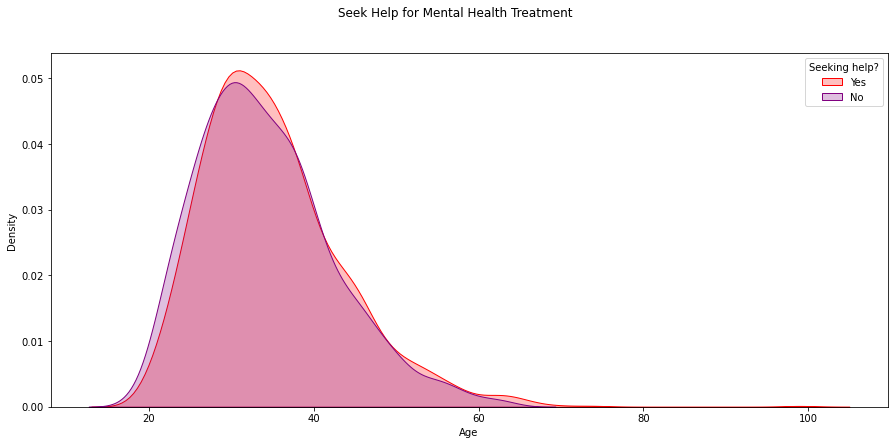

In [58]:
plt.rcParams["figure.figsize"] = (15,6.5)
fig, ax = plt.subplots()

sns.kdeplot(eda[eda["sought_mental_treatment"]==1]["age"], shade=True, color="red", ax=ax)
sns.kdeplot(eda[eda["sought_mental_treatment"]==0]["age"], shade=True, color="purple", ax=ax)
plt.legend(title='Seeking help?', loc='upper right', labels=['Yes', 'No'])

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Seek Help for Mental Health Treatment")

Text(0.5, 0.98, 'Current Mental Health')

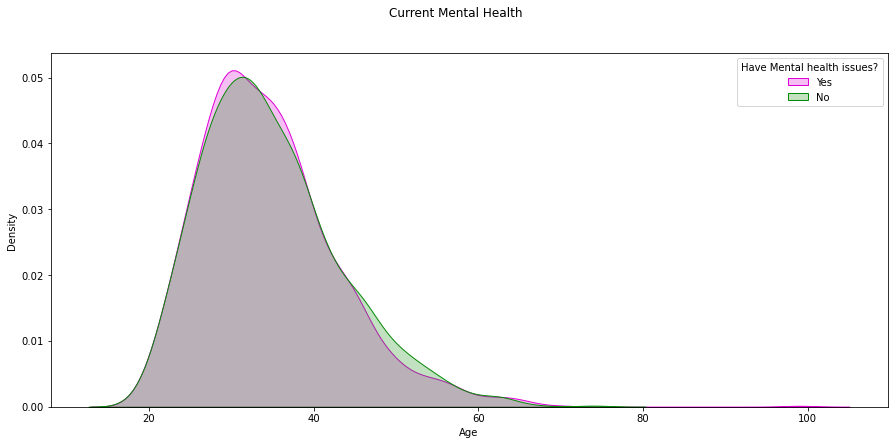

In [59]:
plt.rcParams["figure.figsize"] = (15,6.5)
fig, ax = plt.subplots()

sns.kdeplot(eda[eda["have_mental_illness"]=='Yes']["age"], shade=True, color="#DF01D7", ax=ax)
sns.kdeplot(eda[eda["have_mental_illness"]== 'No']["age"], shade=True, color="#088A08", ax=ax)

plt.legend(title='Have Mental health issues?', loc='upper right', labels=['Yes', 'No'])

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Current Mental Health")

Text(0.5, 0.98, 'Mental Health Insurance from Employer')

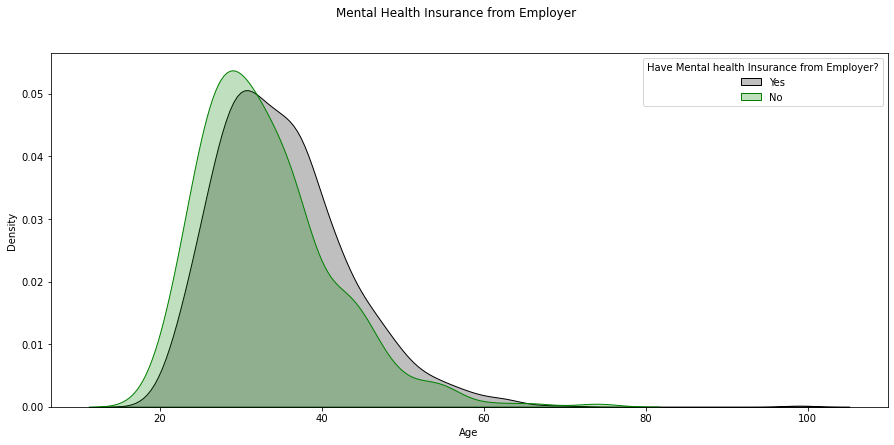

In [60]:
plt.rcParams["figure.figsize"] = (15,6.5)
fig, ax = plt.subplots()

sns.kdeplot(eda[eda["mental_health_benefits_from_current_employer"]=='Yes']["age"], shade=True, color="black", ax=ax)
sns.kdeplot(eda[eda["mental_health_benefits_from_current_employer"]== 'No']["age"], shade=True, color="green", ax=ax)


plt.legend(title='Have Mental health Insurance from Employer?', loc='upper right', labels=['Yes', 'No', "Don't know"])

ax.set_xlabel("Age")
ax.set_ylabel("Density")       

fig.suptitle("Mental Health Insurance from Employer")

In [61]:
#Encoding data
labelDict = {}
oneHotEncodeNeededColumns = ['mental_illness_diagnosis', 'mental_health_benefits_from_previous_employers', 'mental_health_benefits_from_current_employer', 'discussing_mental_health_with_coworkers', 'discussing_mental_health_with_supervisor', 'sex', 'mental_disorder_in_the_past', 'working_country', 'living_country', 'mental_illness_family_history']
frames = []

for feature in arp_data:
    le = preprocessing.LabelEncoder()
    le.fit(arp_data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    arp_data[feature] = le.transform(arp_data[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    if feature in oneHotEncodeNeededColumns:
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoder_df = pd.DataFrame(encoder.fit_transform(arp_data[[feature]]).toarray())
        for x in range(len(encoder_df.columns)): encoder_df.rename(columns={x : f'{feature}_{x}'}, inplace = True)
        frames.append(encoder_df)

frames.insert(0, arp_data)        
arp_data = pd.concat(frames, axis=1, join='inner')
print(arp_data)
#Get rid of 'Country'
#arp_data = arp_data.drop(['Country'], axis= 1)
#arp_data

      Unnamed: 0  age  sex  self-employed  working_country  living_country  \
0              0   22    1              0               13              13   
1              1   10    1              0                6               6   
2              2   21    1              0               13              13   
3              3   26    1              1               13              13   
4              4   26    0              0                6               6   
...          ...  ...  ...            ...              ...             ...   
2356         167   20    1              0                6               6   
2357         168   22    1              0                6               6   
2359         170   17    0              1                6               6   
2360         171   26    1              0                6               6   
2361         172   10    1              0                6               6   

      mental_illness_family_history  have_mental_illness  \
0  

In [62]:
#checking for null values
total = arp_data.isnull().sum().sort_values(ascending=False)
percent = (arp_data.isnull().sum()/arp_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                                            Total  Percent
Unnamed: 0                                      0      0.0
mental_illness_family_history_0                 0      0.0
mental_disorder_in_the_past_4                   0      0.0
mental_disorder_in_the_past_3                   0      0.0
mental_disorder_in_the_past_2                   0      0.0
...                                           ...      ...
working_country_4                               0      0.0
working_country_3                               0      0.0
working_country_2                               0      0.0
working_country_1                               0      0.0
discussing_mental_health_with_supervisor_3      0      0.0

[78 rows x 2 columns]


In [63]:
arp_data.isna().sum()

Unnamed: 0                                    0
age                                           0
sex                                           0
self-employed                                 0
working_country                               0
                                             ..
discussing_mental_health_with_coworkers_3     0
discussing_mental_health_with_supervisor_0    0
discussing_mental_health_with_supervisor_1    0
discussing_mental_health_with_supervisor_2    0
discussing_mental_health_with_supervisor_3    0
Length: 78, dtype: int64

In [64]:
arp_data

,Unnamed: 0,age,sex,self-employed,working_country,living_country,mental_illness_family_history,have_mental_illness,mental_disorder_in_the_past,number_of_employees_your_company_has,...,mental_health_benefits_from_current_employer_3,mental_health_benefits_from_current_employer_4,discussing_mental_health_with_coworkers_0,discussing_mental_health_with_coworkers_1,discussing_mental_health_with_coworkers_2,discussing_mental_health_with_coworkers_3,discussing_mental_health_with_supervisor_0,discussing_mental_health_with_supervisor_1,discussing_mental_health_with_supervisor_2,discussing_mental_health_with_supervisor_3
0,0,22,1,0,13,13,1,0,4,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,10,1,0,6,6,2,1,4,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,21,1,0,13,13,1,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,26,1,1,13,13,1,1,4,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,26,0,0,6,6,2,1,4,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356,167,20,1,0,6,6,2,1,2,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2357,168,22,1,0,6,6,1,0,2,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2359,170,17,0,1,6,6,0,0,0,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2360,171,26,1,0,6,6,0,1,4,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [65]:
print(arp_data['sought_mental_treatment'].value_counts())
print(arp_data['have_mental_illness'].value_counts())

1    1088
0     671
Name: sought_mental_treatment, dtype: int64
1    954
0    805
Name: have_mental_illness, dtype: int64


In [66]:
# Drop 'dont know' and 'NAN' values
#arp_data = arp_data[arp_data['have_mental_illness'] != 0]
#arp_data = arp_data[arp_data['have_mental_illness'] != 1]
#arp_data = arp_data[arp_data['have_mental_illness'] != 3]

In [67]:
#print(arp_data['mental_illness_family_history'].value_counts())
#print(arp_data['sought_mental_treatment'].value_counts())
#print(arp_data['have_mental_illness'].value_counts())
#print(arp_data['mental_disorder_in_the_past'].value_counts())
#print(arp_data['mental_illness_diagnosis'].value_counts())

print(arp_data['age_range'].value_counts())
#print(arp_data['sex'].value_counts())
#print(arp_data['self-employed'].value_counts())
print(arp_data['working_country'].value_counts())
print(arp_data['living_country'].value_counts())
print(arp_data['number_of_employees_your_company_has'].value_counts())

2    1133
1     609
0      11
3       6
Name: age_range, dtype: int64
6     1202
13     289
5       75
3       49
8       31
4       22
9       22
11      22
10      21
7       11
1       10
12       4
2        1
Name: working_country, dtype: int64
6     1193
13     287
5       77
3       49
8       30
4       26
11      25
9       23
10      22
7       13
1        9
12       3
0        1
2        1
Name: living_country, dtype: int64
5    371
4    349
2    348
1    346
0    242
3    103
Name: number_of_employees_your_company_has, dtype: int64


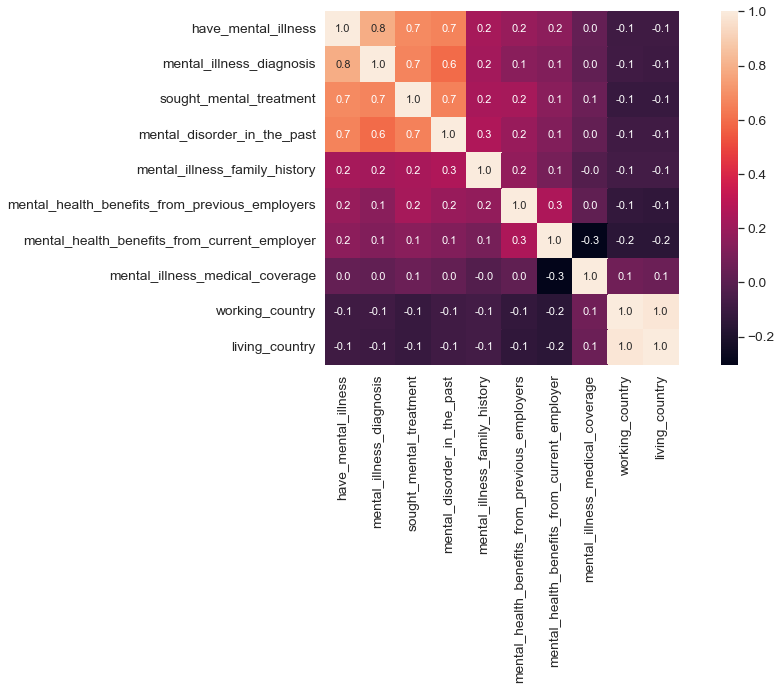

In [75]:
#Mental health correlation matrix
k = 16 #number of variables for heatmap
eda = arp_data[['working_country', 'living_country', 
'mental_illness_family_history', 'have_mental_illness', 'mental_disorder_in_the_past', 
'mental_health_benefits_from_previous_employers', 'mental_illness_diagnosis', 
'mental_health_benefits_from_current_employer', 'sought_mental_treatment', 
'mental_illness_medical_coverage']]
corrmat = eda.corr()
columns = corrmat.nlargest(k, 'have_mental_illness')['have_mental_illness'].index
comatrix = np.corrcoef(eda[columns].values.T)
sns.set(font_scale=1.25)
heatmap = sns.heatmap(comatrix, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size': 11}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [146]:
# save cleaned data to csv
arp_data.to_csv("./cleaned_data/mental_health_data_2016-2021_ready_for_ML.csv")